In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the API key.
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
# specified units = imperial to set the units to Fahrenheit

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=babac775c94c1657d664fdd2e9ffe704


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 
# zip pairs the lats and lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Now that we have our ordered pairs of latitudes and longitudes in a list, 
# we can iterate through the list of tuples and find the nearest city to those coordinates.
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

653

In [8]:
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuche
City not found. Skipping...
Processing Record 2 of Set 1 | tukrah
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | turkistan
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | guata
City not found. Skipping...
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | mirabad
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | san cristobal
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set

City not found. Skipping...
Processing Record 36 of Set 4 | katsuura
Processing Record 37 of Set 4 | tarnogskiy gorodok
Processing Record 38 of Set 4 | churachandpur
Processing Record 39 of Set 4 | adamovka
Processing Record 40 of Set 4 | hirara
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | bemidji
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | lavrentiya
Processing Record 46 of Set 4 | andarab
City not found. Skipping...
Processing Record 47 of Set 4 | champerico
Processing Record 48 of Set 4 | serov
Processing Record 49 of Set 4 | kendari
Processing Record 50 of Set 4 | youkounkoun
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | payakumbuh
Processing Record 3 of Set 5 | terrell
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | aranos
Processing Record 6 of Set 5 | vaitape
Processing Record 7 of Set 5 | hualmay
Processing Record 8 of Set 5 | petropavl

Processing Record 25 of Set 8 | ayan
Processing Record 26 of Set 8 | margate
Processing Record 27 of Set 8 | andenes
Processing Record 28 of Set 8 | enshi
Processing Record 29 of Set 8 | illoqqortoormiut
City not found. Skipping...
Processing Record 30 of Set 8 | road town
Processing Record 31 of Set 8 | jinka
Processing Record 32 of Set 8 | yining
Processing Record 33 of Set 8 | sharan
Processing Record 34 of Set 8 | chicama
Processing Record 35 of Set 8 | trussville
Processing Record 36 of Set 8 | marawi
Processing Record 37 of Set 8 | pangnirtung
Processing Record 38 of Set 8 | anadyr
Processing Record 39 of Set 8 | labuhan
Processing Record 40 of Set 8 | ahipara
Processing Record 41 of Set 8 | zheshart
Processing Record 42 of Set 8 | saint george
Processing Record 43 of Set 8 | george
Processing Record 44 of Set 8 | zyryanka
Processing Record 45 of Set 8 | dong hoi
Processing Record 46 of Set 8 | caruray
Processing Record 47 of Set 8 | kavaratti
Processing Record 48 of Set 8 | suda

Processing Record 11 of Set 12 | inyonga
Processing Record 12 of Set 12 | monte escobedo
Processing Record 13 of Set 12 | ushtobe
Processing Record 14 of Set 12 | yashkul
Processing Record 15 of Set 12 | sistranda
Processing Record 16 of Set 12 | benjamin hill
Processing Record 17 of Set 12 | coihaique
Processing Record 18 of Set 12 | mahibadhoo
Processing Record 19 of Set 12 | richards bay
Processing Record 20 of Set 12 | martigny
Processing Record 21 of Set 12 | bisira
Processing Record 22 of Set 12 | san lawrenz
Processing Record 23 of Set 12 | vila franca do campo
Processing Record 24 of Set 12 | dukuhturi
Processing Record 25 of Set 12 | batouri
Processing Record 26 of Set 12 | west bay
Processing Record 27 of Set 12 | partizansk
Processing Record 28 of Set 12 | majengo
Processing Record 29 of Set 12 | rohri
Processing Record 30 of Set 12 | ibotirama
Processing Record 31 of Set 12 | pudozh
Processing Record 32 of Set 12 | cilegon
Processing Record 33 of Set 12 | bendigo
Processing

In [10]:
#Generally, it isn’t good coding practice to add the pass statement to the except block. Ideally, we want to handle or
#catch each error as it happens and do something specific (e.g., add another try block or print out the error).

In [11]:
len(city_data)

601

In [12]:
# Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tukrah,32.53,20.58,70.02,44,0,10.89,LY,2020-05-09 13:38:58
1,East London,-33.02,27.91,71.60,73,0,8.05,ZA,2020-05-09 13:38:58
2,Turkistan,43.00,68.00,68.07,61,49,11.70,KZ,2020-05-09 13:38:58
3,Vaini,-21.20,-175.20,78.80,94,75,10.29,TO,2020-05-09 13:38:58
4,Bathsheba,13.22,-59.52,86.00,62,20,21.92,BB,2020-05-09 13:38:59
5,Mirabad,30.44,61.84,96.51,9,71,6.15,AF,2020-05-09 13:38:59
6,Hasaki,35.73,140.83,63.00,77,90,5.82,JP,2020-05-09 13:38:59
7,Mahebourg,-20.41,57.70,78.80,69,40,9.17,MU,2020-05-09 13:38:59
8,Hithadhoo,-0.60,73.08,85.10,78,100,14.63,MV,2020-05-09 13:39:00
9,Mataura,-46.19,168.86,47.37,88,2,3.87,NZ,2020-05-09 13:39:00


In [13]:
new_column_order = ["City","Country","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tukrah,LY,32.53,20.58,70.02,44,0,10.89
1,East London,ZA,-33.02,27.91,71.60,73,0,8.05
2,Turkistan,KZ,43.00,68.00,68.07,61,49,11.70
3,Vaini,TO,-21.20,-175.20,78.80,94,75,10.29
4,Bathsheba,BB,13.22,-59.52,86.00,62,20,21.92


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

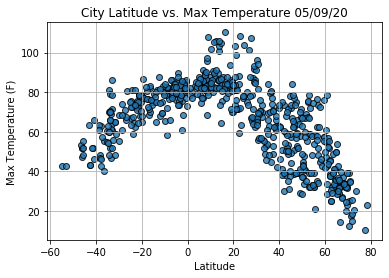

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

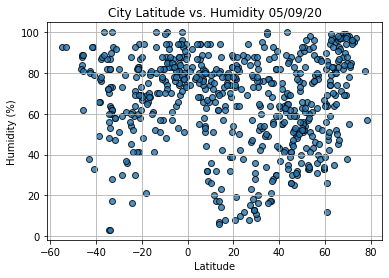

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

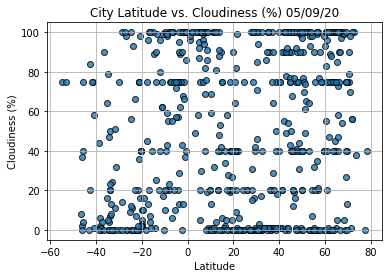

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

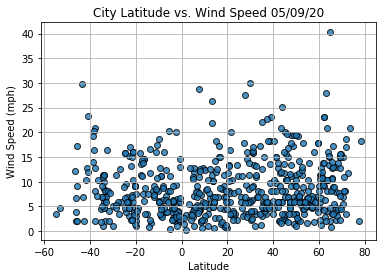

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Linear regression is used to find a relationship between a dependent variable and one or more independent variables. 
# The trick is to find something (a dependent variable) that depends on something else (the independent variable)
# and plot that relationship.


In [21]:
# Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 

# Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable


In [22]:
# To get an output from a function,
# we need to call the function with the correct number of parameters or arguments for the function.

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tukrah,LY,32.53,20.58,70.02,44,0,10.89
2,Turkistan,KZ,43.00,68.00,68.07,61,49,11.70
4,Bathsheba,BB,13.22,-59.52,86.00,62,20,21.92
5,Mirabad,AF,30.44,61.84,96.51,9,71,6.15
6,Hasaki,JP,35.73,140.83,63.00,77,90,5.82


y = -0.88x + 96.6


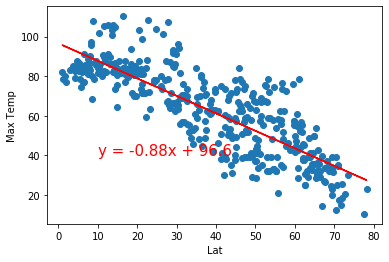

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

    
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values]

#line equation
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.show()

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

    
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values]

#line equation
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.88x + 96.6


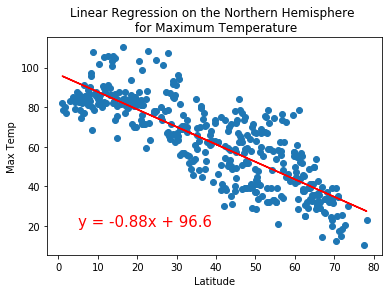

In [27]:


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Linear regression on the Northern Hemisphere
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Max Temp"]
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

    # Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,20))

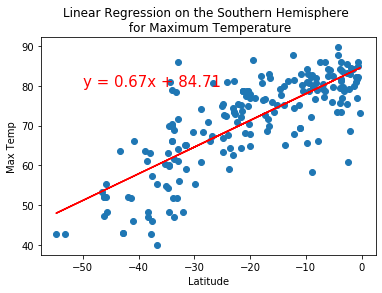

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Linear regression on the Northern Hemisphere
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Max Temp"]
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

    # Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

In [29]:
#The correlation between the latitude and the maximum temperature is 
#strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than
# 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator,
# 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler.
# Check the r-values for your plots. 

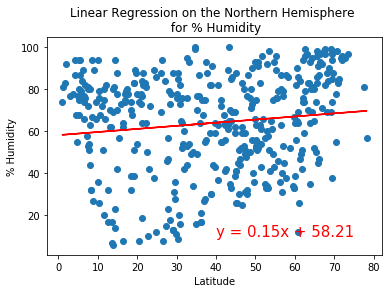

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates): 
    
    # Linear regression on the Northern Hemisphere
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Humidity"]
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [37]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

    
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values]

#line equation
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.27x + 77.41


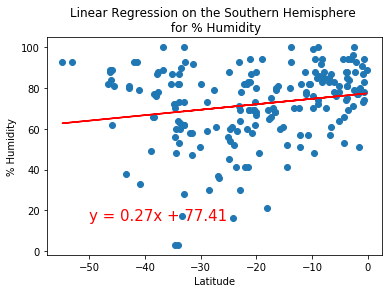

In [38]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Linear regression on the Southern Hemisphere
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Humidity"]
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

    
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values]

#line equation
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.21x + 43.64


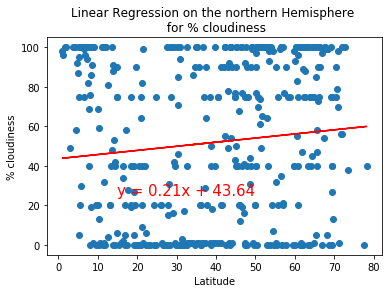

In [45]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Linear regression on the Northern Hemisphere
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Cloudiness"]
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    # Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere \n for % cloudiness', '% cloudiness',(15,25))


In [46]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

    
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values]

#line equation
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 1.21x + 66.94


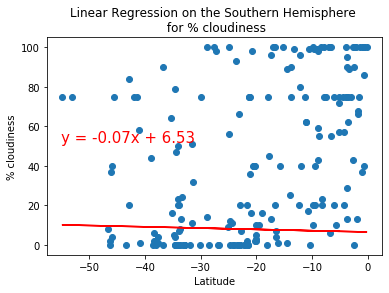

In [61]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Linear regression on the Northern Hemisphere
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Cloudiness"]
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
        # Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % cloudiness', '% cloudiness',(-55,52))


In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

    
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values]

#line equation
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.04x + 6.97


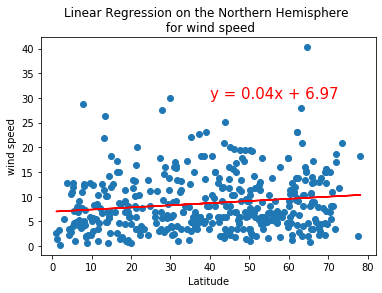

In [53]:


def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Linear regression on the Northern Hemisphere
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Wind Speed"]
    
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
        # Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for wind speed', 'wind speed',(40,30))

In [54]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

    
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(x_value * slope + intercept) for x_value in x_values]

#line equation
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.07x + 6.53


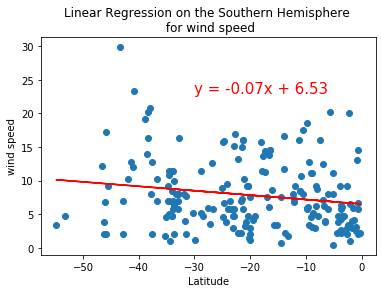

In [57]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Linear regression on the Northern Hemisphere
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Wind Speed"]
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
        # Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for wind speed', 'wind speed',(-30,23))